# Projeto Final

## Importação de bibliotecas e leitura de arquivo 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier

In [21]:
df = pd.read_csv('heart.csv') #carregando o dataset

## Informações 

* **Idade**: em anos
* **Sexo**: o sexo da pessoa
    - **1**: masculino
    - **0**: feminino
* **Tipo**: tipo de dor torácica
 - **0**: assintomático
 - **1**: angina atípica
 - **2**: dor não anginosa
 - **3**: angina típica
* **Pa repouso**: A pressão arterial em repouso da pessoa (mm Hg na admissão ao hospital)
* **Colesterol**: a medição de colesterol da pessoa em mg/dl
* **Glicemia**: glicemia em jejum da pessoa > 120 mg/dl
    - **1** = verdadeiro
    - **0** = falso
* **Ecg repouso**: resultados eletrocardiográficos de repouso
    - **0**: mostrando provável ou definitiva hipertrofia ventricular esquerda
    - **1**: normal
    - **2**: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão de ST > 0,05 mV )
* **Fc max**: A frequência cardíaca máxima da pessoa alcançada
* **Exercicio**: angina foi induzida pelo exercício
    - **1**: sim
    - **0**: não
* **Oldpeak**: depressão de ST induzida pelo exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG.)
* **Inclinacao**: a inclinação do segmento ST do exercício de pico 
    - **0**: inclinação descendente
    - **1**: plano
    - **2**: ascendente
* **Veias**: o numero de veias
* **Talessemia**: Um distúrbio do sangue chamado talassemia 
    - **0**: sem informação
    - **1**: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)
    - **2**: fluxo sanguíneo normal
    - **3**: defeito reversível (é observado um fluxo sanguíneo mas não é normal)
* **Output**: Ataque cardiaco
    - **1**: não
    - **0**: sim

## Limpeza de dados

In [22]:
df = df.rename(columns={'age':'idade', 'sex':'sexo', 'cp':'tipo', 'trtbps':'pa repouso', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'ecg repouso', 'thalachh':'fc max',
       'exng':'exercicio', 'oldpeak':'oldpeak', 'slp':'inclinacao', 'caa':'veias', 'thall':'talessemia', 'output':'output'}) #renomeando colunas

In [23]:
df = df.drop(['inclinacao'], axis=1)

## Analise exploratoria

In [41]:
df.head() #visualiza o dataset

,idade,sexo,tipo,pa repouso,colesterol,glicemia,ecg repouso,fc max,exercicio,oldpeak,veias,talessemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,1


In [42]:
df.corr()['output'] #verificando correlação das colunas com o output

idade         -0.225439
sexo          -0.280937
tipo           0.433798
pa repouso    -0.144931
colesterol    -0.085239
glicemia      -0.028046
ecg repouso    0.137230
fc max         0.421741
exercicio     -0.436757
oldpeak       -0.430696
veias         -0.391724
talessemia    -0.344029
output         1.000000
Name: output, dtype: float64

In [43]:
df.info() #Verificando os tipos de dados e se possue valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idade        303 non-null    int64  
 1   sexo         303 non-null    int64  
 2   tipo         303 non-null    int64  
 3   pa repouso   303 non-null    int64  
 4   colesterol   303 non-null    int64  
 5   glicemia     303 non-null    int64  
 6   ecg repouso  303 non-null    int64  
 7   fc max       303 non-null    int64  
 8   exercicio    303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  veias        303 non-null    int64  
 11  talessemia   303 non-null    int64  
 12  output       303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [44]:
df.describe() 

,idade,sexo,tipo,pa repouso,colesterol,glicemia,ecg repouso,fc max,exercicio,oldpeak,veias,talessemia,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,3.000000,1.000000


<AxesSubplot:>

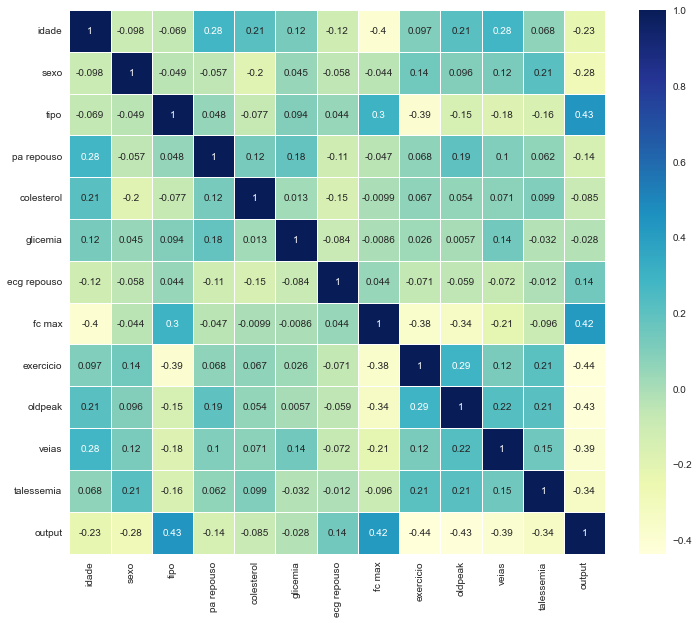

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=.5) #grafico de correlação das colunas 

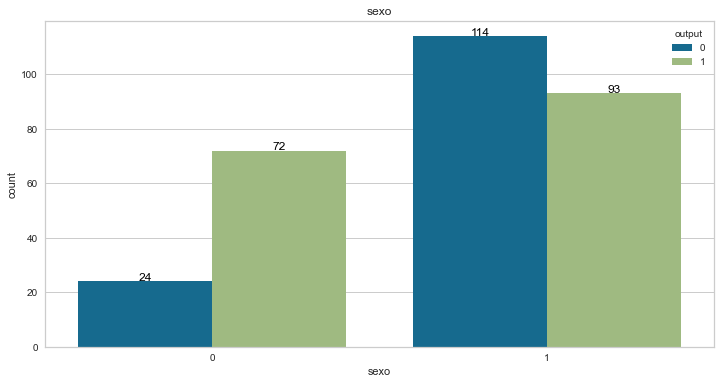

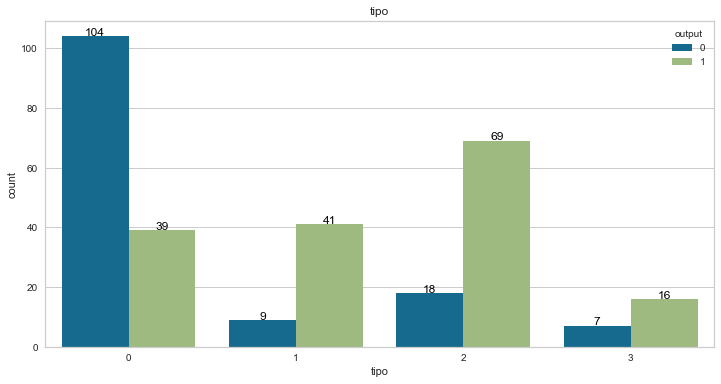

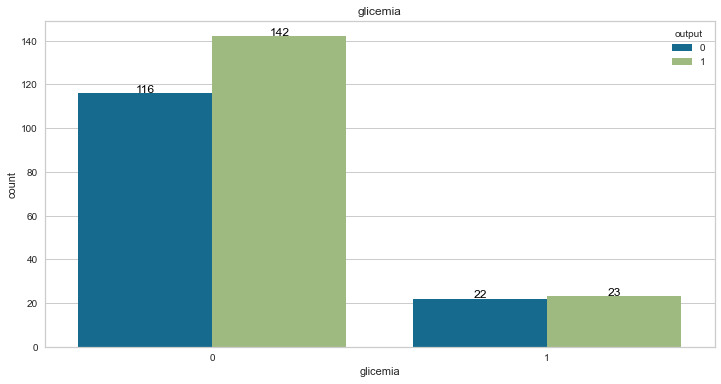

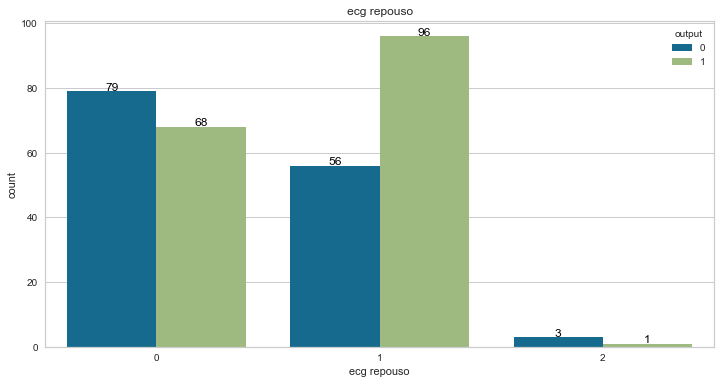

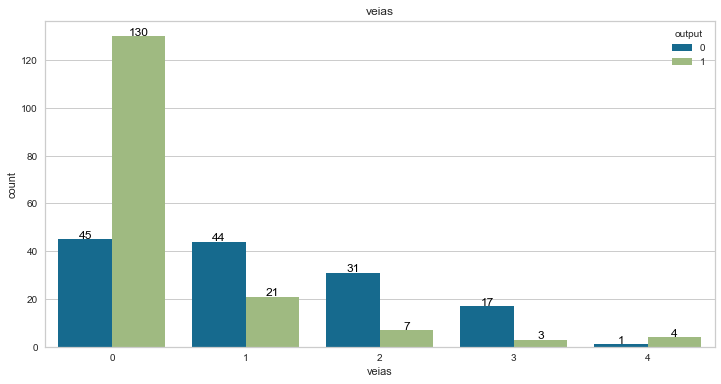

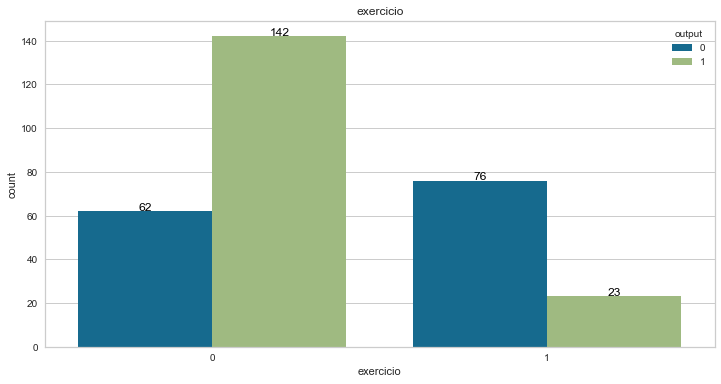

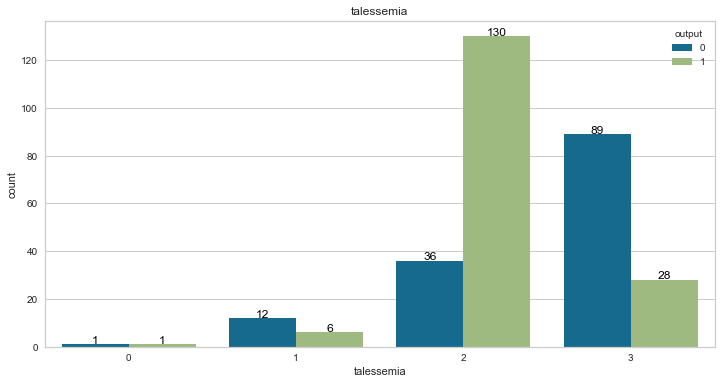

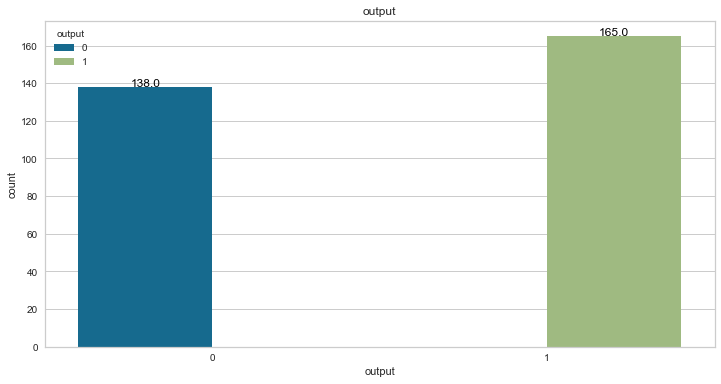

In [46]:
colunas = ['sexo', 'tipo', 'glicemia','ecg repouso', 'veias','exercicio', 'talessemia','output']
df2 = df.loc[:, colunas]

for i in colunas:
    plt.figure(figsize = (12, 6))
    plot = sns.countplot(x = i, data = df2, hue = "output") #gerando os graficos.
    plt.title(i)


    for i in plot.patches:
        plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),  #adicionando números nas colunas
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
    plt.show()
    

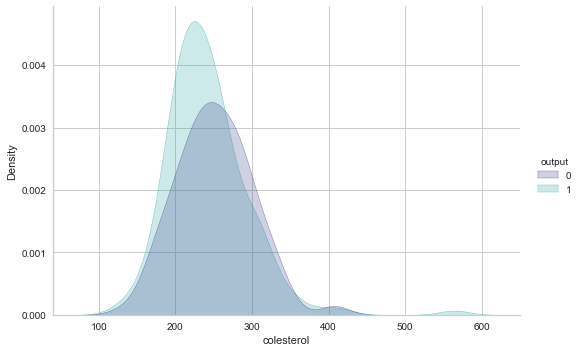

In [47]:
sns.displot(df, x='colesterol', hue='output', kind="kde",fill=True, palette='mako', aspect=1.5) #grafico de distribuição

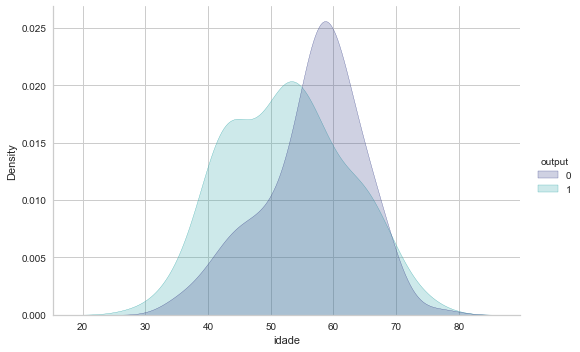

In [52]:
sns.displot(df, x='idade', hue='output', kind="kde",fill=True, palette='mako', aspect=1.5) #grafico de distribuição

## Modelagem

In [53]:
X = df.drop('output', axis=1) #separando X e Y
y = df['output']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #separando x e y de teste

In [26]:
scaler = StandardScaler()     #padroniza os dados                 
scaler.fit(X_train) #treina
X_train = scaler.transform(X_train) #transforma os dados de treino
X_test = scaler.transform(X_test)  #transforma os dados de teste

In [27]:
model = LogisticRegression() #escolhe o modelo que será utilizado
model.fit(X_train, y_train) # treina ele

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

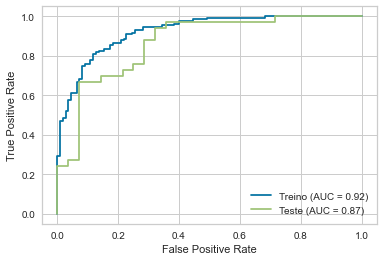

In [28]:
fig, ax = plt.subplots()
plot_roc_curve(model, X_train, y_train, ax=ax, name='Treino')
plot_roc_curve(model, X_test, y_test, ax=ax, name='Teste')  #vizualiza a curva roc do treino e do teste
fig = plt.gcf()  
plt.show()  

In [29]:
adaboost = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=2), 
            n_estimators=100,
            learning_rate=.03)

In [30]:
adaboost.fit(X_train,y_train)
print(roc_auc_score(y_train, adaboost.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, adaboost.predict_proba(X_test)[:, 1]))

0.9700068870523416
0.9004329004329004


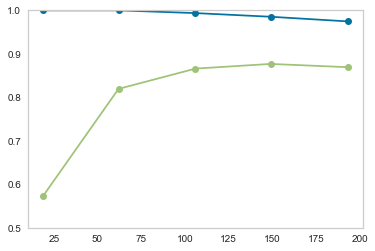

In [27]:
curves = learning_curve(adaboost, X_train, y_train, scoring='roc_auc')
train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

In [31]:
data_train,data_test = train_test_split(df, test_size = 0.2) #separando dados de treino e de teste

In [32]:
classification = setup(data = data_train, target = 'output', session_id=42) #escolhendo a target de treino

,Description,Value
0,session_id,42
1,Target,output
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(242, 13)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
ada = create_model('ada') #escolhendo um modelo

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7647,0.6250,0.7500,0.7500,0.7500,0.5278,0.5278
1,0.8235,0.8194,0.7500,0.8571,0.8000,0.6434,0.6480
2,0.7647,0.9306,0.6667,0.8571,0.7500,0.5342,0.5494
3,0.7059,0.8333,0.8889,0.6667,0.7619,0.3972,0.4260
4,0.7647,0.8333,0.5556,1.0000,0.7143,0.5405,0.6086
5,0.8235,0.7639,0.7778,0.8750,0.8235,0.6483,0.6528
6,0.7647,0.8472,0.6667,0.8571,0.7500,0.5342,0.5494
7,0.5882,0.7500,0.7778,0.5833,0.6667,0.1560,0.1674
8,0.8235,0.8472,0.7778,0.8750,0.8235,0.6483,0.6528


In [34]:
model = tune_model(ada, n_iter=1000,custom_grid ={'learning_rate':[0.05],'n_estimators':[50]}) #tunando o modelo 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7647,0.7847,0.7500,0.7500,0.7500,0.5278,0.5278
1,0.8824,0.9167,0.8750,0.8750,0.8750,0.7639,0.7639
2,0.6471,0.8681,0.5556,0.7143,0.6250,0.3014,0.3099
3,0.7647,0.8472,0.8889,0.7273,0.8000,0.5211,0.5367
4,0.8235,0.8472,0.7778,0.8750,0.8235,0.6483,0.6528
5,0.8235,0.8889,0.7778,0.8750,0.8235,0.6483,0.6528
6,0.8235,0.9097,1.0000,0.7500,0.8571,0.6383,0.6847
7,0.6471,0.8056,0.7778,0.6364,0.7000,0.2817,0.2901
8,0.9412,0.9444,1.0000,0.9000,0.9474,0.8811,0.8874


In [35]:
print(model) #verificando os parametros utilizados

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=50, random_state=42)


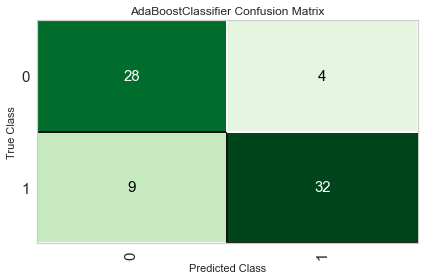

In [36]:
plot_model(ada, plot = 'confusion_matrix') #vizualizando a matriz de confusâo 

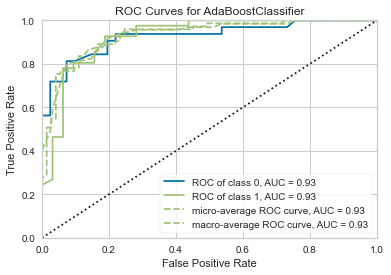

In [37]:
plot_model(model, plot = 'auc') #verificando a acuracia do modelo

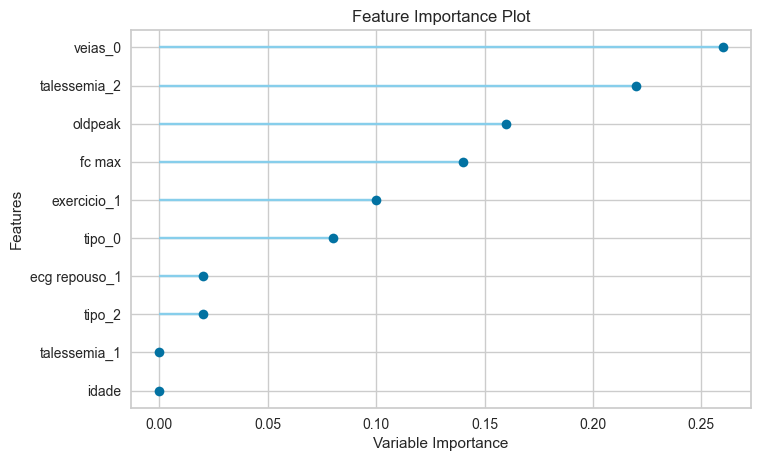

In [38]:
plot_model(model, plot='feature') #verificando quais foram as colunas de mais relevancia

In [39]:
final = finalize_model(model) #finalizando o modelo

In [40]:
predict_model(final, data=data_test)  #testando o modelo nos dados de teste

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8525,0.9093,0.8919,0.8684,0.8800,0.6886,0.6890


,idade,sexo,tipo,pa repouso,colesterol,glicemia,ecg repouso,fc max,exercicio,oldpeak,veias,talessemia,output,Label,Score
163,38,1,2,138,175,0,1,173,0,0.0,4,2,1,1,0.5650
33,54,1,2,125,273,0,0,152,0,0.5,1,2,1,1,0.5529
15,50,0,2,120,219,0,1,158,0,1.6,0,2,1,1,0.6634
49,53,0,0,138,234,0,0,160,0,0.0,0,2,1,1,0.5840
57,45,1,0,115,260,0,0,185,0,0.0,0,2,1,1,0.5837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,54,0,1,132,288,1,0,159,1,0.0,1,2,1,1,0.5451
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1,1,0.6631
285,46,1,0,140,311,0,1,120,1,1.8,2,3,0,0,0.6603
77,59,1,1,140,221,0,1,164,1,0.0,0,2,1,1,0.6446
